### Donor-level stats in cellxgene data portal

Following [sfaira tutorial](https://github.com/theislab/sfaira_tutorials/blob/master/tutorials/cellxgene_download.ipynb)

In [99]:
import sfaira
import scanpy as sc
import pandas as pd
import numpy as np
import anndata
import os
import glob

import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
data_path = os.path.join("/nfs/team205/ed6/data/", "sfaira_data")
cache_path = os.path.join("/nfs/team205/ed6/data/", "sfaira_cache")
meta_path = os.path.join("/nfs/team205/ed6/data/", "sfaira_meta")
if not os.path.exists(data_path):
    os.mkdir(data_path)
if not os.path.exists(cache_path):
    os.mkdir(cache_path)
if not os.path.exists(meta_path):
    os.mkdir(meta_path)

In [10]:
sfaira.settings.cachedir_base = cache_path

In [107]:
## r2py setup
import rpy2.rinterface_lib.callbacks
import logging
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

In [108]:
%load_ext rpy2.ipython

In [109]:
%%R
library(tidyverse)

## Interact w database

In [7]:
dsg = sfaira.data.dataloaders.databases.DatasetSuperGroupDatabases(
    cache_path=data_path, cache_metadata=True)

KeyError: 'ethnicity'

In [4]:
dsg = sfaira.data.dataloaders.databases.DatasetSuperGroupDatabases(
    data_path=data_path, cache_path=cache_path, meta_path=meta_path, cache_metadata=True)

Ontology <class 'sfaira.versions.metadata.base.OntologyUberonLifecyclestage'> is not a DAG, treat child-parent reasoning with care.
Ontology <class 'sfaira.versions.metadata.base.OntologyMondo'> is not a DAG, treat child-parent reasoning with care.
Ontology <class 'sfaira.versions.metadata.base.OntologyUberon'> is not a DAG, treat child-parent reasoning with care.


KeyError: 'ethnicity'

In [5]:
sfaira.__version__

'v0.3.12'

In [48]:
## Subset to human collections
dsg.subset(key='organism', values=['Homo sapiens']) 

## Subset to scRNA-seq protocols (exclude spatial)
protocols = ["10x 3' transcription profiling", "10x 3' v1", "10x 3' v2",
       "10x 3' v3", "10x 5' transcription profiling", "10x 5' v1",
        'CEL-seq2', 'Drop-seq',
        'Smart-seq2', 
       'microwell-seq', 'sci-RNA-seq', 'single-cell RNA sequencing']
dsg.subset(key='assay_sc', values=protocols)

## Keep collections from a known primary tissue
target_collections = []
for k,v in dsg.datasets.items():
    if v.organ is not None:
        target_collections.append(k)
# dsg.subset(key="collection_id", values=target_collections)

NameError: name 'dsg' is not defined

In [ ]:
## Keep collections from published data
DOIs = []
for k in target_collections:
    DOIs.append(dsg.datasets[k].doi)

In [ ]:
target_collections = [target_collections[i] for i,d in enumerate(DOIs) if d[0].startswith('https://doi.org/')]

In [ ]:
dsg.subset(key="id", values=target_collections)

In [ ]:
len(dsg.datasets)

In [ ]:
# dsg.download()

In [ ]:
k = '0fdb6122-4600-40f0-a703-2da47cc7080d'
v = dsg.datasets[k]

In [48]:
v.load()

ValueError: adata of 0fdb6122-4600-40f0-a703-2da47cc7080d already loaded.

In [49]:
v.streamline_features(
        remove_gene_version=True,
        match_to_release={"Homo sapiens": "104"},#, "Mus musculus": "104"},
        subset_genes_to_type="protein_coding"
    )
v.streamline_metadata(keep_orginal_obs=True, keep_id_obs=True )

KeyError: 'ensembl'

In [ ]:
v.adata.obs

In [33]:
obs_to_keep = ['disease', 'sex', 'tissue', 'assay', 'ethnicity', 'development_stage']
donor_obs = v.adata.obs[obs_to_keep + [o + '_ontology_term_id' for o in obs_to_keep] + ["Patient"]].drop_duplicates()

In [56]:
help(re.match)

Help on function match in module re:

match(pattern, string, flags=0)
    Try to apply the pattern at the start of the string, returning
    a Match object, or None if no match was found.



In [75]:
get_putative_donor_obs_col(a)

array(['donor_id'], dtype=object)

In [68]:
a.obs.columns

Index(['n_counts_mrna', 'NUM.SNPS', 'NUM.READS', 'DROPLET.TYPE', 'BEST.GUESS',
       'percent_mito', 'pool', 'well', 'pool_well', 'batch', 'pool_clust',
       'freemux_cluster', 'donor_id', 'timepoint', 'respiratory_support_D0',
       'onset_to_D0_days', 'intubated_days', 'admission_to_discharge',
       'D0_to_death', 'race', 'consent', 'death', 'pulmonary_infection',
       'non_pulmonary_infection', 'leiden', 'onset_to_D0_days-as_float',
       'original_leiden', 'ct1', 'ct2', 'ct3', 'WBC_count1', 'WBC_count2',
       'WBC_count3', 'Lymphocyte_count', 'Monocyte_count', 'cell_group',
       'exclude_restricted', 'IFN_shared_score', 'IFN_beta_score',
       'IFN_gamma_score', 'days_from_start', 'COVID_status', 'admission_level',
       'respiratory_support', 'NIH_clinical', 'COVID_severity',
       'COVID_severity_merged', 'NIH_ordinal', 'tissue_ontology_term_id',
       'assay_ontology_term_id', 'disease_ontology_term_id',
       'development_stage_ontology_term_id', 'cell_type_on

In [22]:
os.listdir(v.data_dir)

['0fdb6122-4600-40f0-a703-2da47cc7080d.h5ad',
 '83b5e943-a1d5-4164-b3f2-f7a37f01b524.h5ad',
 'bdf69f8d-5a96-4d6f-a9f5-9ee0e33597b7.h5ad',
 'f7995301-7551-4e1d-8396-ffe3c9497ace.h5ad',
 'ed2b673b-0279-454a-998c-3eec361edf54.h5ad',
 '1252c5fb-945f-42d6-b1a8-8a3bd864384b.h5ad',
 '1062c0f2-2a44-4cf9-a7c8-b5ed58b4728d.h5ad',
 '9434b020-de42-43eb-bcc4-542b2be69015.h5ad',
 '65badd7a-9262-4fd1-9ce2-eb5dc0ca8039.h5ad']

In [ ]:
cellxgene_donor_obs = pd.DataFrame()
for k,v in dsg.datasets.items():
    print(f"Loading {k}...")
    if v.adata is None:
        v.load()
    obs_to_keep = ['disease', 'sex', 'tissue', 'assay', 'ethnicity', 'development_stage']
    donor_obs = v.adata.obs[obs_to_keep + [o + '_ontology_term_id' for o in obs_to_keep]].drop_duplicates()
    donor_obs['dataset'] = k
    cellxgene_donor_obs = pd.concat([cellxgene_donor_obs, donor_obs])
    v.clear()

Loading edc8d3fe-153c-4e3d-8be0-2108d30f8d70...
Loading 2a498ace-872a-4935-984b-1afa70fd9886...
Loading d5c67a4e-a8d9-456d-a273-fa01adb1b308...
Loading c2a461b1-0c15-4047-9fcb-1f966fe55100...
Loading 1252c5fb-945f-42d6-b1a8-8a3bd864384b...
Loading bdf69f8d-5a96-4d6f-a9f5-9ee0e33597b7...
Loading 83b5e943-a1d5-4164-b3f2-f7a37f01b524...
Loading 9434b020-de42-43eb-bcc4-542b2be69015...
Loading ed2b673b-0279-454a-998c-3eec361edf54...
Loading f7995301-7551-4e1d-8396-ffe3c9497ace...
Loading 65badd7a-9262-4fd1-9ce2-eb5dc0ca8039...
Loading 0fdb6122-4600-40f0-a703-2da47cc7080d...
Loading 1062c0f2-2a44-4cf9-a7c8-b5ed58b4728d...
Loading 8e47ed12-c658-4252-b126-381df8d52a3d...
Loading 774c18c5-efa1-4dc5-9e5e-2c824bab2e34...
Loading 1c739a3e-c3f5-49d5-98e0-73975e751201...
Loading f15e263b-6544-46cb-a46e-e33ab7ce8347...
Loading 06b91002-4d3d-4d2e-8484-20c3b31e232c...
Loading 6c600df6-ddca-4628-a8bb-1d6de1e3f9b4...
Loading 75a881cf-5d88-46e2-bf9b-97e5cbc1bd56...
Loading 873ff933-4fda-4936-9a70-67df11af

### Read with scanpy

In [4]:
from anndata import AnnData
def get_putative_donor_obs_col(a: AnnData):
    return(a.obs.columns.values[a.obs.columns.str.contains("donor|patient", case=False)])

def get_donor_obs(data_path: str, 
                  c: str, 
                  d: str,
                 obs_to_keep = ['disease', 'sex', 'tissue', 'assay', 'ethnicity', 'development_stage']) -> pd.DataFrame:
    '''
    Params:
    -------
    - data_path: path to cellxgene data folder
    - c: collection ID
    - d: dataset .h5ad
    
    '''
    a = sc.read(os.path.join(data_path, c, d), 
                backed=True)
    if a.n_obs > 0:
        ## Find donor ID column
        donor_col = get_putative_donor_obs_col(a)
        print(donor_col)
    
        if len(donor_col) > 0:
            donor_obs = a.obs[obs_to_keep + [o + '_ontology_term_id' for o in obs_to_keep] + list(donor_col)].drop_duplicates()
            donor_obs['dataset'] = d.split('.h5ad')[0]
            donor_obs['collection'] = c
            return(donor_obs)
        else:
            return(None)
    else:
        return(None)

n_collections = len(os.listdir(data_path))
for i,c in enumerate(os.listdir(data_path)):
    print(f"Reading {c} ({i+1}/{n_collections})...")
    collection_donor_obs = pd.DataFrame()
    if not os.path.exists(os.path.join(data_path, c, 'donor_lvl_obs.csv')):
        for d in os.listdir(os.path.join(data_path, c)):
            donor_obs = get_donor_obs(data_path, c, d)
            if donor_obs is not None:
                collection_donor_obs = pd.concat([collection_donor_obs, donor_obs])
        collection_donor_obs.to_csv(os.path.join(data_path, c, 'donor_lvl_obs.csv'))



Reading 32f2fd23-ec74-486f-9544-e5b2f41725f5 (1/68)...
Reading a261413d-835b-4f1e-ab0c-dada55ea6afd (2/68)...
Reading 2d2e2acd-dade-489f-a2da-6c11aa654028 (3/68)...
Reading e02201d7-f49f-401f-baf0-1eb1406546c0 (4/68)...
Reading db468083-041c-41ca-8f6f-bf991a070adf (5/68)...
Reading 2b02dff7-e427-4cdc-96fb-c0f354c099aa (6/68)...
Reading 558385a4-b7b7-4eca-af0c-9e54d010e8dc (7/68)...
Reading ed9185e3-5b82-40c7-9824-b2141590c7f0 (8/68)...
Reading 180bff9c-c8a5-4539-b13b-ddbc00d643e6 (9/68)...
Reading 0434a9d4-85fd-4554-b8e3-cf6c582bb2fa (10/68)...
Reading fbc5881f-1ee3-4ffe-8095-35e15e1a08fc (11/68)...
Reading be21c2d1-2392-47d0-96fb-c625d115e0dc (12/68)...
Reading af893e86-8e9f-41f1-a474-ef05359b1fb7 (13/68)...
Reading 62ef75e4-cbea-454e-a0ce-998ec40223d3 (14/68)...
Reading b0cf0afa-ec40-4d65-b570-ed4ceacc6813 (15/68)...
Reading 120e86b4-1195-48c5-845b-b98054105eec (16/68)...
Reading 0a839c4b-10d0-4d64-9272-684c49a2c8ba (17/68)...
Reading c114c20f-1ef4-49a5-9c2e-d965787fb90c (18/68)...
R

## Collapse donor level obs

In [67]:
obs_to_keep = ['disease', 'sex', 'tissue', 'ethnicity', 'development_stage']

In [81]:
cellxgene_donor_obs = pd.DataFrame()

n_collections = len(os.listdir(data_path))
for i,c in enumerate(os.listdir(data_path)):
    collection_donor_obs = pd.read_csv(os.path.join(data_path, c, 'donor_lvl_obs.csv'), index_col=0)
    collection_donor_obs['collection_id'] = c
    cellxgene_donor_obs = pd.concat([cellxgene_donor_obs, collection_donor_obs])

donor_IDs = cellxgene_donor_obs[['DonorID', 'donor_id', 'donor_uuid', 'donor', 'patient', 'PatientID', 'Patient', 'patientID']].ffill(1).iloc[:,-1]
cellxgene_donor_obs['donor_id'] = donor_IDs
cellxgene_donor_obs = cellxgene_donor_obs[['collection_id', 'donor_id'] + obs_to_keep]

cellxgene_donor_obs['donor_id'] = cellxgene_donor_obs['donor_id'].astype('str')
cellxgene_donor_obs['collection_id'] = cellxgene_donor_obs['collection_id'].astype('str')
cellxgene_donor_obs['donor_unique_ID'] = (cellxgene_donor_obs['collection_id'] + '_' + cellxgene_donor_obs['donor_id'])
cellxgene_donor_obs = cellxgene_donor_obs.drop_duplicates()

cellxgene_donor_obs['tissue_id'] = [''.join(x) for x in cellxgene_donor_obs['tissue'].str.split(' ')]
cellxgene_donor_obs['sample_unique_ID'] = (cellxgene_donor_obs['donor_unique_ID'] + '_' + cellxgene_donor_obs['tissue_id'])

/home/jovyan/my-conda-envs/emma_env/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.ffill will be keyword-only
  if __name__ == '__main__':


### Stats on donors

In [87]:
## Exclude sample level cols
donor_table = cellxgene_donor_obs[['collection_id', 'donor_unique_ID', 'disease', 'sex', 'development_stage']].drop_duplicates()

In [89]:
donor_table['disease'].unique()

array(['normal', 'blastoma', 'type 2 diabetes mellitus', 'Crohn ileitis',
       'COVID-19', 'Alzheimer disease', 'Crohn disease',
       'acute myeloid leukemia', 'acute promyelocytic leukemia',
       'chronic kidney disease', 'acute kidney failure',
       'respiratory system disease', 'hydrosalpinx',
       'myocardial infarction', 'systemic lupus erythematosus',
       'cataract', 'small cell lung carcinoma', 'lung adenocarcinoma',
       'dilated cardiomyopathy',
       'arrhythmogenic right ventricular cardiomyopathy',
       'non-compaction cardiomyopathy', 'influenza'], dtype=object)

In [117]:
donor_table['is_ctrl'] = donor_table['disease'] == 'normal'
cellxgene_donor_obs['is_ctrl'] = cellxgene_donor_obs['disease'] == 'normal'

In [104]:
n_ctrls = donor_table.groupby('collection_id').sum('is_ctrl')
n_ctrls['n_donors'] = donor_table.groupby('collection_id').size()
## Keep disease collections only
n_ctrls = n_ctrls[n_ctrls['is_ctrl'] < n_ctrls['n_donors']]

<AxesSubplot:xlabel='n_donors', ylabel='is_ctrl'>

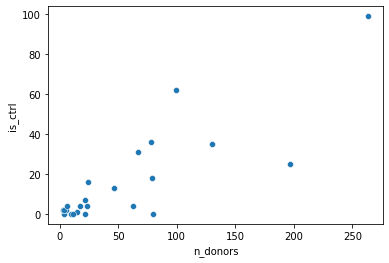

In [105]:
sns.scatterplot(data=n_ctrls, x = 'n_donors', y = 'is_ctrl')

In [118]:
%%R -i cellxgene_donor_obs
head(cellxgene_donor_obs)

                         collection_id     donor_id disease    sex tissue
1 32f2fd23-ec74-486f-9544-e5b2f41725f5          A13  normal female uterus
2 32f2fd23-ec74-486f-9544-e5b2f41725f5          A30  normal female uterus
3 32f2fd23-ec74-486f-9544-e5b2f41725f5           E1  normal female uterus
4 32f2fd23-ec74-486f-9544-e5b2f41725f5           E2  normal female uterus
5 32f2fd23-ec74-486f-9544-e5b2f41725f5           E3  normal female uterus
6 32f2fd23-ec74-486f-9544-e5b2f41725f5 SAMN15049051  normal female uterus
  ethnicity           development_stage
1   unknown     37-year-old human stage
2   unknown     23-year-old human stage
3   unknown     29-year-old human stage
4   unknown     26-year-old human stage
5   unknown     26-year-old human stage
6   unknown human early adulthood stage
                                    donor_unique_ID tissue_id
1          32f2fd23-ec74-486f-9544-e5b2f41725f5_A13    uterus
2          32f2fd23-ec74-486f-9544-e5b2f41725f5_A30    uterus
3           32f2

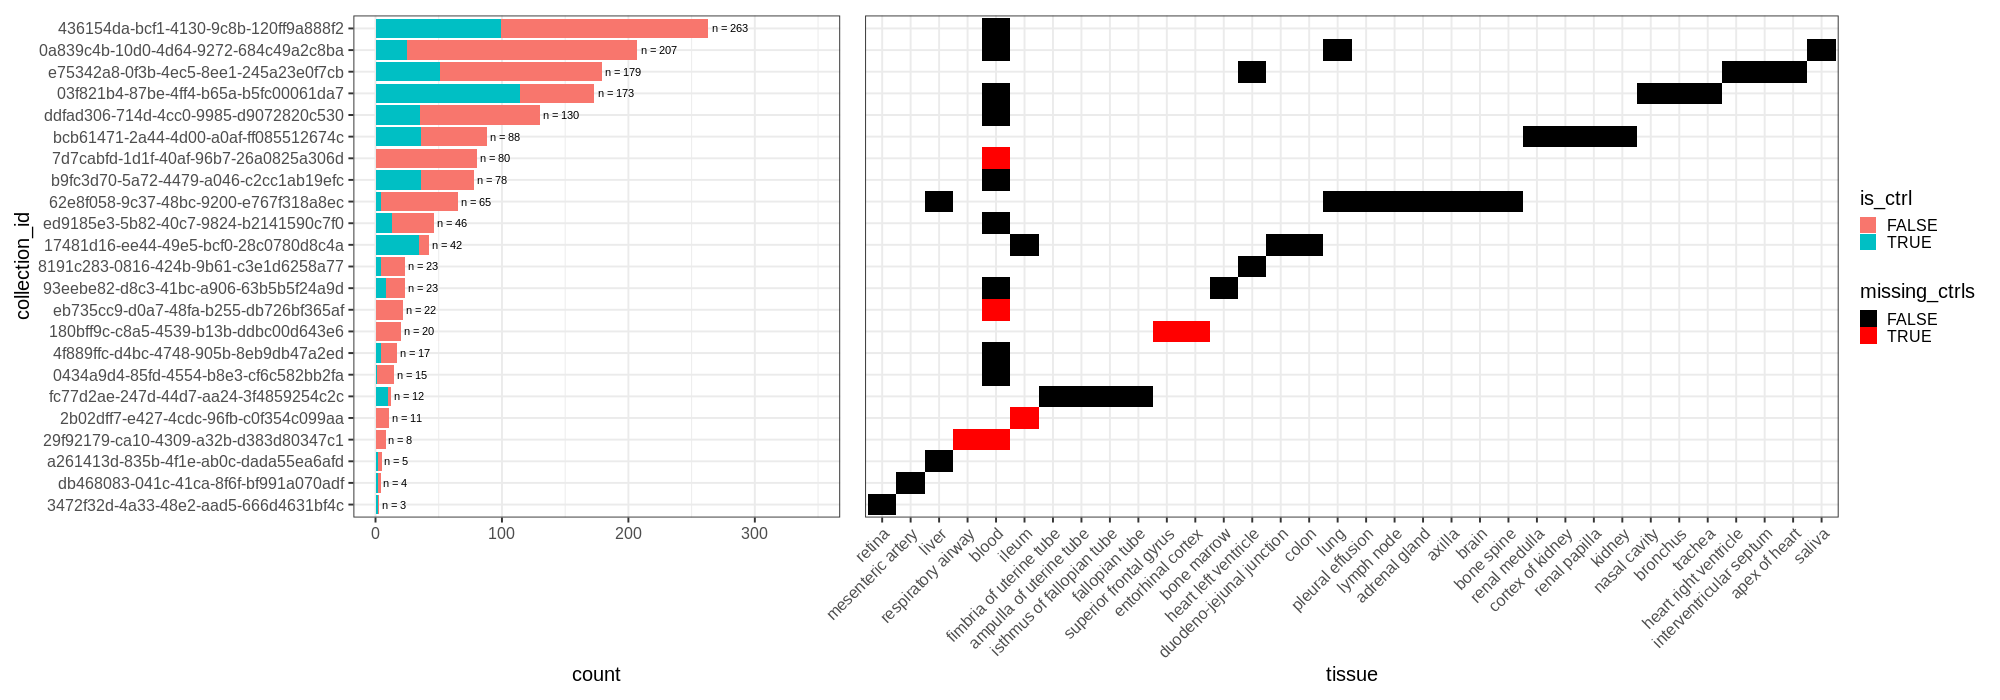

In [170]:
%%R -w 2000 -h 700
library(patchwork)
pl_df <- cellxgene_donor_obs %>%
    group_by(collection_id) %>%
    filter(any(disease != 'normal')) %>%
    mutate(n_donors = n()) %>%
    mutate(n_ctrls = sum(is_ctrl)) %>%
    ungroup() %>%
    arrange(n_donors) %>%
    mutate(collection_id = factor(collection_id, levels=unique(collection_id))) %>%
    mutate(missing_ctrls = n_ctrls == 0)
    
p1 <- pl_df %>%
    ggplot(aes(collection_id)) +
    geom_bar(aes(fill=is_ctrl)) +
    geom_text(data=. %>% select(collection_id, n_donors) %>% distinct(), 
              aes(label=paste('n =',n_donors), y = n_donors), hjust=-0.1) +
    ylim(0,350) +
    theme_bw(base_size=20) +
    coord_flip()
    
p2 <- pl_df %>%
    arrange(collection_id) %>%
    mutate(tissue = factor(tissue, levels=unique(tissue))) %>%
    ggplot(aes(tissue, collection_id, fill=missing_ctrls)) +
    geom_tile() +
    theme_bw(base_size=20) +
    scale_fill_manual(values=c(`TRUE`='red', `FALSE`='black')) +
    theme(axis.text.x=element_text(angle=45, vjust=1, hjust=1))
    
(p1 | (p2 + theme(axis.text.y=element_blank(), axis.title.y=element_blank(), axis.ticks.y=element_blank()))) +
plot_layout(guides='collect', widths=c(1,2))

### Which disease datasets are available?

In [177]:
cellxgene_donor_obs.collection_id.nunique()

46

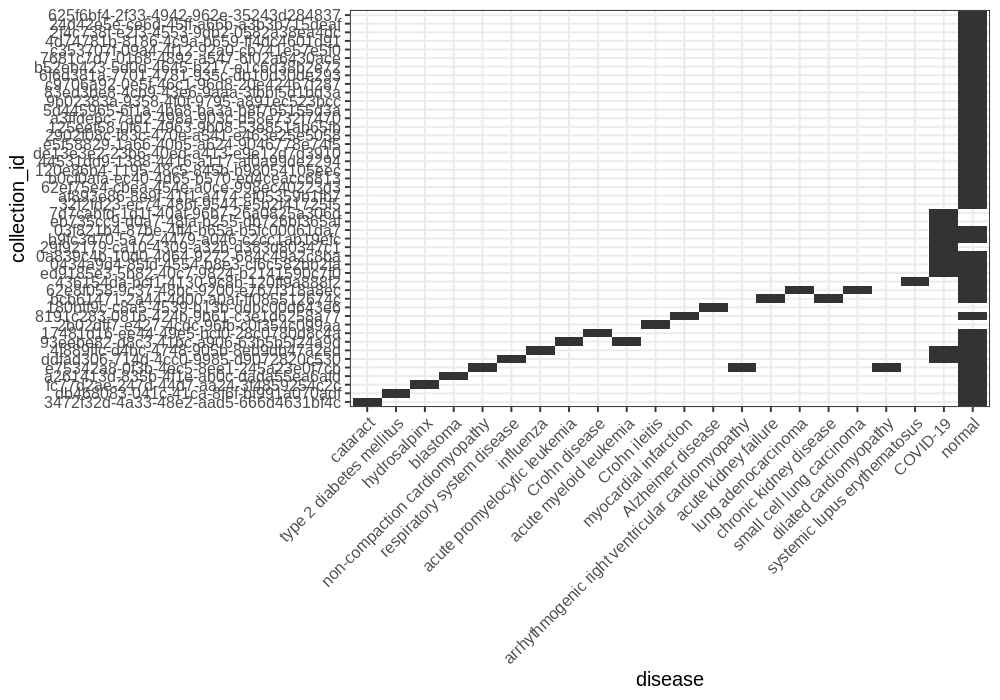

In [191]:
%%R -w 1000 -h 700
cellxgene_donor_obs %>%
#     filter(disease != 'normal') %>%
    group_by(disease) %>%
    mutate(n_samples = n()) %>%
    ungroup() %>%
    arrange(n_samples) %>%
    mutate(disease = factor(disease, levels=unique(disease))) %>%
    arrange(disease) %>%
    mutate(collection_id = factor(collection_id, levels=unique(collection_id))) %>%
    ggplot(aes(disease, collection_id)) +
    geom_tile() +
    theme_bw(base_size=20) +
    theme(axis.text.x=element_text(angle=45, vjust=1, hjust=1))

In [190]:
'c353707f-09a4-4f12-92a0-cb741e57e5f0' in cellxgene_donor_obs.collection_id.tolist()

True

In [189]:
cellxgene_donor_obs.collection_id.nunique()

46